In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
ccba = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_ccba_full_hashed.csv')
cdtx = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_cdtx0001_full_hashed.csv')
custinfo = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_custinfo_full_hashed.csv')
dp = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_dp_full_hashed.csv')
remit = pd.read_csv('/home/bill/moneylaundring/dataset/public_train_x_remit1_full_hashed.csv')
p_date = pd.read_csv('/home/bill/moneylaundring/dataset/public_x_alert_date.csv')
t_date = pd.read_csv('/home/bill/moneylaundring/dataset/train_x_alert_date.csv')
answer = pd.read_csv('/home/bill/moneylaundring/dataset/train_y_answer.csv')

In [185]:
ccba_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_ccba_full_hashed.csv')
cdtx_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_cdtx0001_full_hashed.csv')
custinfo_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_custinfo_full_hashed.csv')
dp_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_dp_full_hashed.csv')
remit_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_remit1_full_hashed.csv')
p_date_test = pd.read_csv('/home/bill/moneylaundring/private_dataset/private_x_alert_date.csv')

In [42]:
ccba_merge = ccba.groupby('cust_id')
new_ccba = ccba_merge['cycam'].max()
new_ccba = pd.DataFrame(new_ccba)
new_ccba

,cycam
cust_id,
0015cc01f553512007705edf855baa16f1b57a16fb107e0882c5cb0535d297a5,134614.0
002d6bc6382e759c9a5b6bb2c8dda9add2f38cd87e10ca3efda9a312e97b342c,406614.0
002f13f534d0bd9fcc1848db3ff5c7b1179d117f8de8055b7394696b948ec9b4,314421.0
0031e83ddef78e57d17ac5dce088627b7745be8ff6cffcbc0a79aff9fedd93f0,202831.0
0032adaf4a8731b4d6a3fdcba32f9ebdcd336490eda155b9bc5d18de6b65f381,20238.0
...,...
ffa5bcc6f88df5c33e809da4daa54de0031803f37d8f114b0ce2a70519099edc,208683.0
ffae7fef923c78298cd647a3d573e48cc1404b07ac794a63f436399ceca4ed9d,208765.0
ffdbc1a5135cb6feddf7355e5656abf6973f21639c7b9b9c8a23f77a194369c9,203231.0


In [186]:
ccba_merge_test = ccba_test.groupby('cust_id')
new_ccba_test = ccba_merge_test['cycam'].max()
new_ccba_test = pd.DataFrame(new_ccba_test)
new_ccba_test

,cycam
cust_id,
01b1735c3dbf0a35c1c989bb45434ce4326b365b73db0612190e56b2858e0184,120633.0
01c705b457297805c1c08137cb3adb164b8f393c265db2c3aff0a5484a703302,306239.0
035e2ebcd5c23f4dd0f1fc81a1fca8afd3121f7431bb585fa99c22e1a7164dba,1526090.0
0397056eb3652da244521539502ba1125c61c33c02a0084f9dae183bf6ae0508,411253.0
03e1bde277b33ccb68dc08cb120c761649622f44b0acc1fb284b7e1ef5ced626,20778.0
...,...
fd0ae9a4d32233ea311bd5ac65ed70bee5f1410f6e4d016602ef48f2cea62c0b,208728.0
fd18e359b0e0f16ba1f16c5aa76e5ef76064793b0ee00702a7018f53cbb41db3,824010.0
fd4620b0e018b626a0a5094bec42111466f2039fb8ea36a3090dcdeadc8389b0,104251.0


In [43]:
cinfo = custinfo.merge(new_ccba,on='cust_id',how='outer')
cinfo = cinfo.merge(t_date, on='alert_key')
cinfo = cinfo.merge(answer, on='alert_key')

In [193]:
cinfo_test = custinfo_test.merge(new_ccba_test,on='cust_id',how='outer')
cinfo_test = cinfo_test.merge(p_date_test, on='alert_key')


In [194]:
cinfo_test

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date
0,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398
1,368186,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,404
2,374259,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,417
3,365163,7ad6b2889c6d0b906d73a5012f429a831f2d6f996bba26...,1,19.0,0.0,4,NaN,398
4,365166,252117094a387944f2d8aea76ca95fd927064bdaf72e1c...,1,19.0,789841.0,6,NaN,398
...,...,...,...,...,...,...,...,...
2000,378401,d83280f4a3615d197e2e3424d89860dbb1082932668f3a...,1,11.0,140956.0,3,124237.0,425
2001,378404,cea868fa7c2c37d4e27a26e3a974fead480b27b90cba5a...,1,9.0,480320.0,5,257194.0,425
2002,378407,3da1a0fe59cfec28b709c3767625a43ad5b4dda50c6027...,1,12.0,62072.0,4,104013.0,425
2003,378410,c93e592c596e068a2c1fb4e435e67a70cb3a40dfc60f51...,1,12.0,0.0,3,93811.0,425


In [44]:
cinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag
0,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,NaN,6,0
1,174202,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,NaN,7,0
2,174952,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,NaN,8,0
3,177764,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,NaN,12,0
4,178768,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,NaN,13,0
...,...,...,...,...,...,...,...,...,...
23901,351904,2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...,1,12.0,1454.0,5,519218.0,364,0
23902,351926,830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...,1,9.0,87564.0,4,NaN,364,0
23903,351929,f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...,1,4.0,1199.0,3,NaN,364,0
23904,352103,c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...,1,19.0,441617.0,4,150623.0,364,0


In [195]:
cinfo[cinfo['cycam'].isna()]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag


In [196]:
cinfo_test[cinfo_test['cycam'].isna()]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date
3,365163,7ad6b2889c6d0b906d73a5012f429a831f2d6f996bba26...,1,19.0,0.0,4,NaN,398
4,365166,252117094a387944f2d8aea76ca95fd927064bdaf72e1c...,1,19.0,789841.0,6,NaN,398
5,365167,0585831d57313ede3fa11841dc488df3d5080e7b03c49a...,1,17.0,2944611.0,6,NaN,398
16,365186,bd47c67a9d9cdd26007df624ff2f0860526e1e09d3a409...,1,19.0,48113.0,3,NaN,398
17,365759,bd47c67a9d9cdd26007df624ff2f0860526e1e09d3a409...,1,19.0,48113.0,3,NaN,399
...,...,...,...,...,...,...,...,...
1986,378060,1bbe308ae3be65fba9fd8ea40114f0d1eac12f32bbd61c...,1,12.0,0.0,3,NaN,425
1987,378076,a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...,3,15.0,1280748.0,4,NaN,425
1989,378187,bb0ff084194a7b617f9389e0427ab5ac69ecadc492ade0...,1,5.0,3363.0,2,NaN,425
1990,378189,675ff486307ef7f86b5bdc3992ad7bd7cbabfa959cb837...,1,19.0,2432297.0,8,NaN,425


In [46]:
cinfo['cycam'].fillna(0,inplace=True)

In [197]:
cinfo_test['cycam'].fillna(0,inplace=True)

In [198]:
cinfo.isna().any()

alert_key          False
cust_id            False
risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
date               False
sar_flag           False
dtype: bool

In [191]:
cinfo_test.isna().any()

alert_key          False
cust_id            False
risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
date               False
dtype: bool

In [48]:
print('shape of the before outliers :',cinfo.shape)
cinfo = cinfo[np.abs(cinfo['total_asset']-cinfo['total_asset'].mean())<=(3*cinfo['total_asset'].std())]
print('shape of the before outliers :',cinfo.shape)

shape of the before outliers : (23906, 9)
shape of the before outliers : (23629, 9)


In [49]:
print('shape of the before outliers :',cinfo.shape)
cinfo = cinfo[np.abs(cinfo['cycam']-cinfo['cycam'].mean())<=(3*cinfo['cycam'].std())]
print('shape of the before outliers :',cinfo.shape)

shape of the before outliers : (23629, 9)
shape of the before outliers : (23539, 9)


In [50]:
cinfo

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag
0,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0
1,174202,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,7,0
2,174952,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,8,0
3,177764,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,12,0
4,178768,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,13,0
...,...,...,...,...,...,...,...,...,...
23901,351904,2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...,1,12.0,1454.0,5,519218.0,364,0
23902,351926,830b22ee65eef58b2d51d20143f7aeb1ef9bd00b8f0435...,1,9.0,87564.0,4,0.0,364,0
23903,351929,f0d7fb934f97688f16691d9aeb6db22db08e8f8a07e122...,1,4.0,1199.0,3,0.0,364,0
23904,352103,c71eff54ff8d901590eef33bc16dfddd93a2051d7acfe4...,1,19.0,441617.0,4,150623.0,364,0


In [51]:
cinfo['occupation_code'].fillna(0,inplace=True)

In [52]:
cdtx = pd.merge(cinfo, cdtx, left_on=['cust_id','date'], right_on=['cust_id','date'])
dp = pd.merge(cinfo, dp, left_on=['cust_id','date'], right_on=['cust_id','tx_date'])
remit = pd.merge(cinfo, remit, left_on=['cust_id','date'], right_on=['cust_id','trans_date'])

In [199]:
cdtx_test = pd.merge(cinfo_test, cdtx_test, left_on=['cust_id','date'], right_on=['cust_id','date'])
dp_test = pd.merge(cinfo_test, dp_test, left_on=['cust_id','date'], right_on=['cust_id','tx_date'])
remit_test = pd.merge(cinfo_test, remit_test, left_on=['cust_id','date'], right_on=['cust_id','trans_date'])

In [53]:
cdtx

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag,country,cur_type,amt
0,316973,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,298,0,130,47,2671.0
1,345532,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,104804.0,2,174655.0,351,0,130,47,9256.0
2,325899,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,86994.0,5,206512.0,320,0,130,47,516.0
3,344036,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,44832.0,5,206512.0,350,0,130,47,45.0
4,344036,74214c478dc6519fbefe4bc31693865bdcd698ab974b64...,3,15.0,44832.0,5,206512.0,350,0,130,47,107.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48013,351269,46977bcdead5dc51d07ae82387b767be141c05dfd813f2...,1,17.0,33366.0,4,568349.0,363,0,130,47,1467.0
48014,351269,46977bcdead5dc51d07ae82387b767be141c05dfd813f2...,1,17.0,33366.0,4,568349.0,363,0,44,47,1216.0
48015,351654,d3868068634ce495f3bf0cd6ff02b7f848455168c3d0d0...,2,9.0,98128.0,5,1013581.0,364,0,130,47,193.0
48016,351904,2a6c462095ed3a74cb1d5828ca65315cb5ef30a8b1ea54...,1,12.0,1454.0,5,519218.0,364,0,130,47,143.0


In [200]:
cdtx_test

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,country,cur_type,amt
0,368186,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,404,130,47,103.0
1,373816,1a38d11e93a25e855e46d313347577f823274e9de332ba...,1,12.0,87060.0,3,30958.0,414,130,47,251.0
2,365768,c62baab3b4829e0c15b13741548b58719a8c63b4b6a25b...,1,2.0,786.0,3,122570.0,399,130,47,10231.0
3,368081,c62baab3b4829e0c15b13741548b58719a8c63b4b6a25b...,1,2.0,786.0,3,122570.0,404,130,47,225.0
4,368850,c62baab3b4829e0c15b13741548b58719a8c63b4b6a25b...,1,2.0,786.0,3,122570.0,405,130,47,107.0
...,...,...,...,...,...,...,...,...,...,...,...
1793,377924,bc3b751806ecb0c12ec89d6942030b895fdac997f07e71...,1,12.0,1405403.0,4,1516896.0,425,130,47,1450.0
1794,377924,bc3b751806ecb0c12ec89d6942030b895fdac997f07e71...,1,12.0,1405403.0,4,1516896.0,425,130,47,18810.0
1795,378240,b795b1f6bc864ca3bee0cf4e876103f2850be9e8a7fab6...,1,15.0,863667.0,3,308741.0,425,130,47,1951.0
1796,378404,cea868fa7c2c37d4e27a26e3a974fead480b27b90cba5a...,1,9.0,480320.0,5,257194.0,425,130,47,98.0


In [54]:
cdtx_X = cdtx[['risk_rank','occupation_code','total_asset','AGE','cycam','country','cur_type','amt','date']]
cdtx_y = cdtx[['sar_flag']]
cdtx_idx = cdtx[['alert_key']]

In [201]:
cdtx_X_test = cdtx_test[['risk_rank','occupation_code','total_asset','AGE','cycam','country','cur_type','amt','date']]
cdtx_idx_test = cdtx_test[['alert_key']]

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test , train_indices, test_indices= train_test_split(cdtx_X, cdtx_y, cdtx_idx, test_size = 0.1, random_state=0)

In [57]:
cdtx_ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),[0,1,3,5,6,7])], remainder='passthrough')
X_train = cdtx_ct.fit_transform(X_train)
X_test = cdtx_ct.transform(X_test)

In [215]:
X_train.shape

(43216, 7721)

In [58]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# classifier = RandomForestClassifier(n_estimators=100, criterion='log_loss', random_state=0)
# classifier.fit(X_train, y_train.values.ravel())
regressor = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
regressor.fit(X_train, y_train.values.ravel())


RandomForestClassifier(criterion='entropy', random_state=0)

In [62]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

/home/bill/anaconda3/envs/moneylaundring/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = regressor.predict(X_test)
y_pred_svm = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred)
print(cm)
print(cm2)

[[4757    0]
 [   3   42]]
[[4757    0]
 [   3   42]]


In [60]:
print('Test set Accuracy: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

Test set Accuracy: 99.94 %


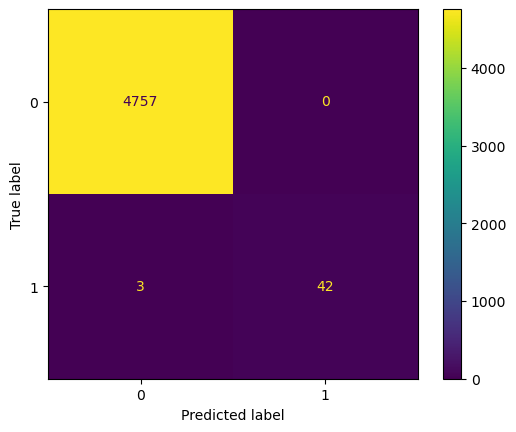

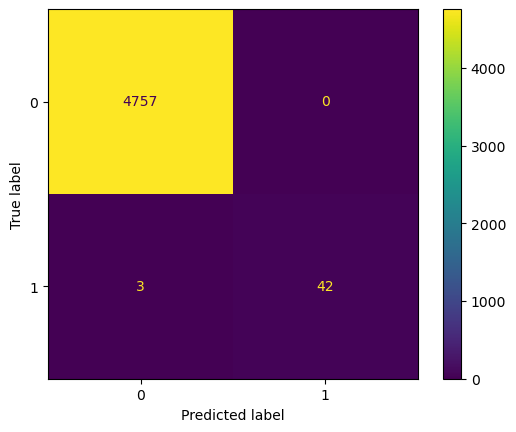

In [64]:
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
dis = ConfusionMatrixDisplay(confusion_matrix=cm2)
dis.plot()
plt.show()

In [65]:
dp

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0,CR,6,16,2,1038.0,3.311,20,NaN,NaN,0,1
1,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0,CR,6,15,2,20902.0,33.940,20,NaN,NaN,0,1
2,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0,DB,6,15,2,30119.0,33.680,20,NaN,NaN,0,1
3,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0,DB,6,19,2,26701.0,28.405,20,NaN,NaN,0,1
4,172802,82595ac69158ae08d34156784bdec0d9e2ca5b242b6d2a...,1,19.0,1449978.0,7,0.0,6,0,CR,6,16,2,415.0,28.435,20,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162092,352111,67a8baafafecb5408944a7d089cda0168967144c1bd41f...,1,17.0,829412.0,6,523405.0,364,0,DB,364,1,2,3234.0,1.000,16,NaN,NaN,0,0
162093,352111,67a8baafafecb5408944a7d089cda0168967144c1bd41f...,1,17.0,829412.0,6,523405.0,364,0,DB,364,12,2,2987.0,1.000,12,NaN,NaN,0,0
162094,352111,67a8baafafecb5408944a7d089cda0168967144c1bd41f...,1,17.0,829412.0,6,523405.0,364,0,DB,364,1,2,719.0,1.000,16,NaN,NaN,0,0
162095,352111,67a8baafafecb5408944a7d089cda0168967144c1bd41f...,1,17.0,829412.0,6,523405.0,364,0,DB,364,12,2,570.0,1.000,12,NaN,NaN,0,0


In [202]:
dp_test

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
0,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,CR,398,14,2,230382.0,29.535,20,NaN,NaN,0,1
1,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,DB,398,14,2,11268.0,29.570,20,NaN,NaN,0,1
2,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,DB,398,18,2,108083.0,1.000,15,NaN,NaN,0,1
3,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,DB,398,14,2,5098.0,1.000,16,NaN,NaN,0,0
4,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,CR,398,14,2,50982.0,1.000,4,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14834,378428,33e5c111ee0e4e8a73181c2738402bc465222ff02b8ed4...,1,19.0,9138.0,2,0.0,425,CR,425,9,2,4007.0,29.125,20,NaN,NaN,0,1
14835,378428,33e5c111ee0e4e8a73181c2738402bc465222ff02b8ed4...,1,19.0,9138.0,2,0.0,425,DB,425,9,2,1947.0,29.160,20,NaN,NaN,0,1
14836,378428,33e5c111ee0e4e8a73181c2738402bc465222ff02b8ed4...,1,19.0,9138.0,2,0.0,425,DB,425,9,2,1983.0,29.160,20,NaN,NaN,0,1
14837,378428,33e5c111ee0e4e8a73181c2738402bc465222ff02b8ed4...,1,19.0,9138.0,2,0.0,425,CR,425,9,2,897.0,1.000,13,4.0,146.0,1,1


In [66]:
def db_cr2num(row):
    return 0 if row == 'DB' else 1

In [67]:
dp['debit_credit'] = dp['debit_credit'].apply(db_cr2num)


In [203]:
dp_test['debit_credit'] = dp_test['debit_credit'].apply(db_cr2num)

In [69]:
dp['tx_amt'].fillna(0, inplace=True)

In [204]:
dp_test['tx_amt'].fillna(0, inplace=True)

In [82]:
dp.isna().any()

alert_key          False
cust_id            False
risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
date               False
sar_flag           False
debit_credit       False
tx_date            False
tx_time            False
tx_type            False
tx_amt             False
exchg_rate         False
info_asset_code    False
fiscTxId           False
txbranch           False
cross_bank         False
ATM                False
dtype: bool

In [205]:
dp_test.isna().any()

alert_key          False
cust_id            False
risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
date               False
debit_credit       False
tx_date            False
tx_time            False
tx_type            False
tx_amt             False
exchg_rate         False
info_asset_code    False
fiscTxId            True
txbranch            True
cross_bank         False
ATM                False
dtype: bool

In [81]:
dp['fiscTxId'].fillna(-1,inplace=True)
dp['txbranch'].fillna(-1,inplace=True)

In [206]:
dp_test['fiscTxId'].fillna(-1,inplace=True)
dp_test['txbranch'].fillna(-1,inplace=True)

In [130]:
dp_X = dp[['risk_rank','occupation_code','total_asset','AGE','cycam','tx_type','tx_amt','exchg_rate','info_asset_code','cross_bank','ATM','txbranch','date']]
dp_y = dp[['sar_flag']]
dp_idx = dp[['alert_key']]

In [207]:
dp_X_test = dp[['risk_rank','occupation_code','total_asset','AGE','cycam','tx_type','tx_amt','exchg_rate','info_asset_code','cross_bank','ATM','txbranch','date']]
dp_idx_test = dp[['alert_key']]

In [84]:
dp_X.isna().any()

risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
tx_type            False
tx_amt             False
exchg_rate         False
info_asset_code    False
cross_bank         False
ATM                False
fiscTxId           False
txbranch           False
date               False
dtype: bool

In [208]:
dp_X_test.isna().any()

risk_rank          False
occupation_code    False
total_asset        False
AGE                False
cycam              False
tx_type            False
tx_amt             False
exchg_rate         False
info_asset_code    False
cross_bank         False
ATM                False
txbranch           False
date               False
dtype: bool

In [141]:
from sklearn.model_selection import train_test_split
X_train_dp, X_test_dp, y_train_dp, y_test_dp , train_indices_dp, test_indices_dp= train_test_split(dp_X, dp_y, dp_idx, test_size = 0.1, random_state=0)

In [132]:
X_train_dp

,risk_rank,occupation_code,total_asset,AGE,cycam,tx_type,tx_amt,exchg_rate,info_asset_code,cross_bank,ATM,txbranch,date
42213,3,19.0,2841207.0,4,306239.0,2,20431.0,1.000,13,1,1,313.0,315
49659,3,19.0,601072.0,5,302667.0,2,2064.0,1.000,16,0,0,-1.0,320
144616,3,18.0,526504.0,3,0.0,2,2006.0,1.000,13,1,1,313.0,293
138848,1,19.0,8944.0,5,31050.0,2,554.0,27.605,20,0,1,-1.0,278
152922,3,18.0,688157.0,3,0.0,2,2508.0,1.000,13,1,1,313.0,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97639,1,3.0,31152.0,4,100924.0,2,297.0,1.000,1,0,1,-1.0,32
95939,1,5.0,9077.0,2,62902.0,1,0.0,1.000,13,0,1,134.0,25
152315,3,18.0,688157.0,3,0.0,2,3009.0,1.000,13,1,1,313.0,343
117952,1,17.0,2161.0,2,0.0,2,4532.0,1.000,1,0,1,-1.0,151


In [142]:
dp_ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),[0,1,5,7,8,9,10,11,12])], remainder='passthrough')
X_train_dp = dp_ct.fit_transform(X_train_dp)
X_test_dp = dp_ct.transform(X_test_dp)

In [218]:
X_train_dp.shape

(145887, 1786)

In [122]:
X_test_dp.shape

(16210, 40804)

In [143]:
regressor_dp = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
regressor_dp.fit(X_train_dp, y_train_dp.values.ravel())

RandomForestClassifier(criterion='entropy', random_state=0)

In [144]:
y_pred_dp = regressor_dp.predict(X_test_dp)

cm = confusion_matrix(y_test_dp, y_pred_dp)

print(cm)


[[15953     1]
 [   51   205]]


In [136]:
remit

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,sar_flag,trans_date,trans_no,trade_amount_usd
0,303465,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,279,0,279,0,34612.0
1,304174,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,280,0,280,0,34736.0
2,306002,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,281,0,281,0,35043.0
3,306617,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,284,0,284,0,35409.0
4,307305,b212d14cb35676926682b2cf849e295d948888f556c07e...,1,2.0,43580.0,2,174655.0,285,0,285,0,35730.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5402,347352,702db69e197738aa6b452412d9e0fc2ae597d08cf45ca5...,1,9.0,2622095.0,2,0.0,355,0,355,4,20550.0
5403,347497,d4dd2a675c87bc40d0bcc5fcce83b25ea4c819aed95a4d...,1,17.0,2044693.0,4,1018778.0,356,0,356,3,26609.0
5404,347497,d4dd2a675c87bc40d0bcc5fcce83b25ea4c819aed95a4d...,1,17.0,2044693.0,4,1018778.0,356,0,356,3,33752.0
5405,349092,28abd881caea3537fc13b6f9a4286eb1ede5db2f90e5a6...,3,9.0,2708369.0,4,304175.0,358,0,358,4,61348.0


In [209]:
remit_test

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE,cycam,date,trans_date,trans_no,trade_amount_usd
0,365126,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,398,398,0,17423.0
1,368186,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,404,404,0,17202.0
2,374259,95a6c0fd787a7f03473b58897e0d696d4ba27c61003f92...,3,12.0,342570.0,3,113666.0,417,417,0,17266.0
3,365195,c62baab3b4829e0c15b13741548b58719a8c63b4b6a25b...,1,2.0,786.0,3,122570.0,398,398,0,29132.0
4,365768,c62baab3b4829e0c15b13741548b58719a8c63b4b6a25b...,1,2.0,786.0,3,122570.0,399,399,0,29255.0
...,...,...,...,...,...,...,...,...,...,...,...
624,377358,7775aff6ca1af46f134a1536b1e63b9a4b0fee6e0961fd...,1,12.0,87967.0,2,314591.0,424,424,0,17966.0
625,377457,49a742dd1262035093d108d4808bddebcad01f3490b009...,1,16.0,1597728.0,5,0.0,424,424,4,54579.0
626,377933,89452c475b55369c635942ac40c669c220b0ab01078c69...,2,19.0,427981.0,4,0.0,425,425,0,15136.0
627,378076,a3f3ab8ef1dc14645641197c93c50af693039cc6f2b879...,3,15.0,1280748.0,4,0.0,425,425,0,104341.0


In [212]:
remit_X = remit[['risk_rank','occupation_code','total_asset','AGE','cycam','trans_no','trade_amount_usd','date']]
remit_y = remit[['sar_flag']]
remit_idx = remit[['alert_key']]

In [210]:
remit_X_test = remit_test[['risk_rank','occupation_code','total_asset','AGE','cycam','trans_no','trade_amount_usd','date']]
remit_idx_test = remit_test[['alert_key']]

In [213]:
remit_X

,risk_rank,occupation_code,total_asset,AGE,cycam,trans_no,trade_amount_usd,date
0,1,2.0,43580.0,2,174655.0,0,34612.0,279
1,1,2.0,43580.0,2,174655.0,0,34736.0,280
2,1,2.0,43580.0,2,174655.0,0,35043.0,281
3,1,2.0,43580.0,2,174655.0,0,35409.0,284
4,1,2.0,43580.0,2,174655.0,0,35730.0,285
...,...,...,...,...,...,...,...,...
5402,1,9.0,2622095.0,2,0.0,4,20550.0,355
5403,1,17.0,2044693.0,4,1018778.0,3,26609.0,356
5404,1,17.0,2044693.0,4,1018778.0,3,33752.0,356
5405,3,9.0,2708369.0,4,304175.0,4,61348.0,358


In [211]:
remit_X_test

,risk_rank,occupation_code,total_asset,AGE,cycam,trans_no,trade_amount_usd,date
0,3,12.0,342570.0,3,113666.0,0,17423.0,398
1,3,12.0,342570.0,3,113666.0,0,17202.0,404
2,3,12.0,342570.0,3,113666.0,0,17266.0,417
3,1,2.0,786.0,3,122570.0,0,29132.0,398
4,1,2.0,786.0,3,122570.0,0,29255.0,399
...,...,...,...,...,...,...,...,...
624,1,12.0,87967.0,2,314591.0,0,17966.0,424
625,1,16.0,1597728.0,5,0.0,4,54579.0,424
626,2,19.0,427981.0,4,0.0,0,15136.0,425
627,3,15.0,1280748.0,4,0.0,0,104341.0,425


In [177]:
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r , train_indices_r, test_indices_r= train_test_split(remit_X, remit_y, remit_idx, test_size = 0.3, random_state=2)

In [178]:
r_ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),[0,1,5,7])], remainder='passthrough')
X_train_r = r_ct.fit_transform(X_train_r)
X_test_r = r_ct.transform(X_test_r)

In [179]:
regressor_r = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=0)
regressor_r.fit(X_train_r, y_train_r.values.ravel())

RandomForestClassifier(criterion='entropy', random_state=0)

In [180]:
y_pred_r = regressor_r.predict(X_test_r)

cm = confusion_matrix(y_test_r, y_pred_r)

print(cm)


[[1595    0]
 [  27    1]]


In [216]:
dp_X.to_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_train_X.csv', index=False)
dp_y.to_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_train_y.csv', index=False)
dp_idx.to_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_train_idx.csv', index=False)
cdtx_X.to_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_train_X.csv', index=False)
cdtx_y.to_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_train_y.csv', index=False)
cdtx_idx.to_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_train_idx.csv', index=False)
remit_X.to_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_train_X.csv', index=False)
remit_y.to_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_train_y.csv', index=False)
remit_idx.to_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_train_idx.csv', index=False)

In [217]:
dp_X_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_test_X.csv', index=False)
dp_idx_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/dp_test_idx.csv', index=False)
cdtx_X_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_test_X.csv', index=False)
cdtx_idx_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/cdtx_test_idx.csv', index=False)
remit_X_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_test_X.csv', index=False)
remit_idx_test.to_csv('/home/bill/moneylaundring/contest/processed_dataset/remit_test_idx.csv', index=False)